In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [8]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [27]:
df.shape

(962, 2)

In [33]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

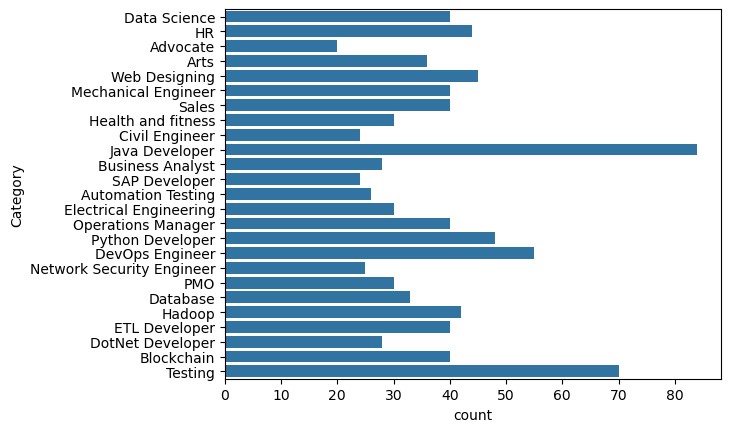

In [37]:
sns.countplot(df['Category'])

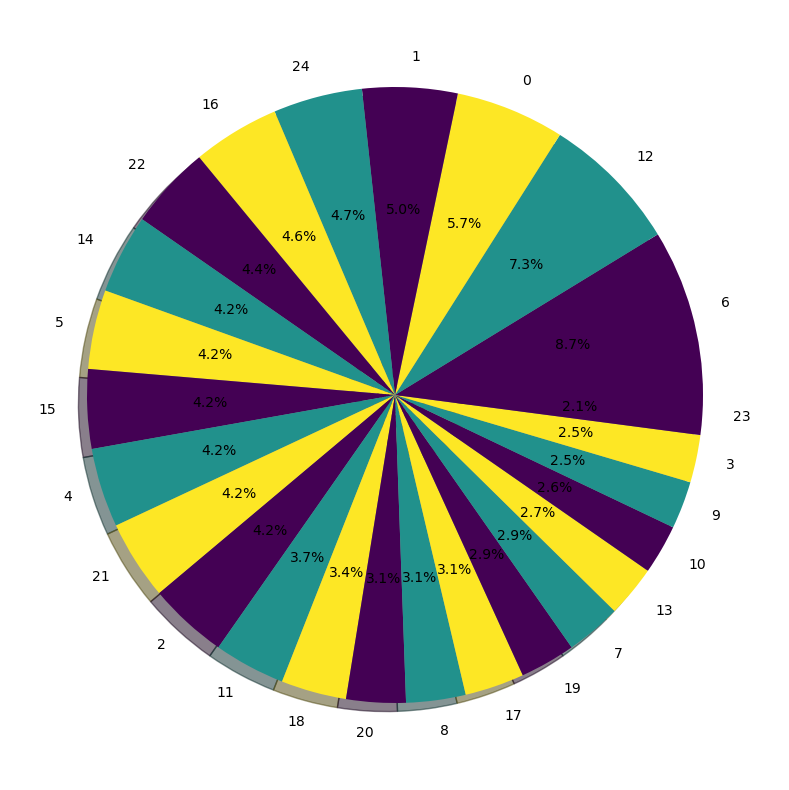

In [36]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

# Create a pie chart with:
# - counts: values for each category
# - labels: unique category names
# - autopct: display percentage values with 1 decimal point
# - shadow: add 3D shadow effect
# - colors: generate 3 evenly spaced colors from viridis colormap
plt.pie(counts, labels = labels, autopct='%1.1f%%', shadow = True, colors = plt.cm.viridis(np.linspace(0,1,3)))
plt.show()

In [40]:
import re
def cleanResume(txt):
    cleanTxt = re.sub('http\\S+\\s',' ',txt) # remove url
    cleanTxt = re.sub('@\\S+',' ',cleanTxt) # remove @ using in mail address
     # Define special characters to remove
    special_chars = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""  
    # Remove all special characters
    cleanTxt = re.sub(rf'[{re.escape(special_chars)}]', '', cleanTxt)   
    cleanTxt = re.sub(r'[^\x00-\x7f]', ' ', cleanTxt)
    return cleanTxt

In [42]:
# Apply a transformation to the 'Resume' column in the dataframe
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))
                               # ^ lambda function takes each value (x) from the column
                               #   and passes it to cleanResume() function
                               #   Note: could be simplified to just .apply(cleanResume)

In [44]:
df['Resume'][0]

'Skills  Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery  Machine learning Regression SVM Na  ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA  Neural Nets  Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau  Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision  Open CV and understanding of Deep learningEducation Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate  Ernst  Young LLP\r\nSkill Details \r\nJAVASCRIPT Exprience  24 months\r\njQuery Exprience  24 months\r\nPython Exprience  24 monthsCompany Details \r\ncompany  Ernst  Young LLP\r\ndescription  Fraud Investigations and Dispute Services   Assurance\r\nTECHNOLOGY ASSISTED REVIEW\r\nTAR 

In [143]:
cleanResume("http://helloworld and we should only see this, not see gmail at @gmail.com ####43")

' and we should only see this not see gmail at   43'

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
# Fit the label encoder to the 'Category' column to learn unique categories
le.fit(df['Category'])
# Transform categorical values in 'Category' column to numeric labels
df['Category'] = le.transform(df['Category'])

In [26]:
print(df['Category'].unique())

[ 6 12  0  1 24 16 22 14  5 15  4 21  2 11 18 20  8 17 19  7 13 10  9  3
 23]


In [ ]:
# 6 -> Data Science
# 12 -> HR
# 0 -> Advocate
# 1 -> Art
# 24 -> Web Designing
# 16 -> Mechanical Engineer
# 22 -> Sales
# 14 -> Health and fitness
# 5 -> Civil Engineer
# 15 -> Java Developer 
# 4 -> Business Analyst
# 21 -> SAP Developer
# 2 -> Automation Testing
# 11 -> Electrical engineering
# 18 -> operations manager
# 20 -> python developer
# 8 -> devops engineer
# 17 -> network security engineer
# 19 -> pmo
# 7 -> database
# 13 -> hadoop
# 10 -> etl developer
# 9 -> donet developer
# 3-> blockchain
# 23 -> testing

In [48]:
# Convert resume text data into TF-IDF numerical features
# 1. Import TF-IDF vectorizer from scikit-learn
# 2. Initialize vectorizer: remove English stop words (e.g., 'the', 'is', 'at')
# 3. tfidf.fit(df['Resume']) : Fit vectorizer to learn vocabulary from resume texts
# 4. Transform resume texts into TF-IDF matrix (documents × terms)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

In [54]:
from sklearn.model_selection import train_test_split

In [60]:
# Split the dataset into training and testing sets
# requiredText: feature data (text content)
# df['Category']: target labels
# test_size=0.2: 20% of data for testing, 80% for training
# random_state=42: set seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size = 0.2, random_state = 42)

In [62]:
X_train.shape

(769, 7888)

In [64]:
X_test.shape

(193, 7888)

In [82]:
# train model and print the classification report:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure that X_train and X_test are dense if they are sparse
# The code uses a conditional (ternary) operator to check if `X_train` and `X_test` have a `toarray()` method using `hasattr()`
# If `toarray()` exists (meaning the data is in sparse format):
#   - Converts the sparse matrix to a dense array using `toarray()`
# If `toarray()` doesn't exist (meaning the data is already dense):
#   - Keeps the original format of `X_train` and `X_test`

X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# 1. Train KNeighborsClassifier
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 0.9845
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  

In [86]:
# Initialize Support Vector Classification model with OneVsRestClassifier for multi-class classification
svc_model = OneVsRestClassifier(SVC())

# Train the SVC model on training data
svc_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_svc = svc_model.predict(X_test)

# Print model evaluation metrics
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")  # Print accuracy score
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")  # Print confusion matrix
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")  # Print detailed classification metrics


SVC Results:
Accuracy: 0.9948
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0 

In [88]:
# 3. Train RandomForestClassifier
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 0.9845
Confusion Matrix:
[[ 1  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0

In [90]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

In [92]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svc_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

# when you have the output, you can map the value as following:
# 6 -> Data Science
# 12 -> HR
# 0 -> Advocate
# 1 -> Art
# 24 -> Web Designing
# 16 -> Mechanical Engineer
# 22 -> Sales
# 14 -> Health and fitness
# 5 -> Civil Engineer
# 15 -> Java Developer 
# 4 -> Business Analyst
# 21 -> SAP Developer
# 2 -> Automation Testing
# 11 -> Electrical engineering
# 18 -> operations manager
# 20 -> python developer
# 8 -> devops engineer
# 17 -> network security engineer
# 19 -> pmo
# 7 -> database
# 13 -> hadoop
# 10 -> etl developer
# 9 -> donet developer
# 3-> blockchain
# 23 -> testing

In [94]:
myresume = """
Sarah Williams is a dedicated and skilled advocate with over 10 years of experience in providing legal representation to clients across various sectors, including criminal law, civil litigation, and family law. With a deep understanding of legal procedures and case law, Sarah has successfully handled numerous cases in the courtroom, negotiating favorable settlements and providing expert legal advice to individuals and businesses.

She holds a law degree from XYZ University and is a licensed attorney, practicing law in multiple jurisdictions. Sarah is passionate about ensuring justice is served and strives to make legal processes more accessible to her clients. She is known for her excellent research and analytical skills, attention to detail, and commitment to upholding the law with integrity.

Key Skills:
- Criminal Law
- Civil Litigation
- Family Law
- Contract Law
- Legal Research and Writing
- Courtroom Advocacy
- Legal Counseling and Advice
- Client Relationship Management
- Legal Compliance and Regulations
- Negotiation and Settlement

Certifications and Licenses:
- Licensed Attorney at Law, XYZ State Bar
- Certification in Criminal Law, XYZ University

Education:
JD in Law, XYZ University, 2010-2013

Professional Experience:
- Senior Advocate at ABC Law Firm (2016-Present)
- Associate Advocate at DEF Legal Group (2013-2016)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Advocate-focused resume
pred(myresume)

0

In [98]:
myresume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""

# Now, test the model with the Network Security Engineer-focused resume
pred(myresume)

17

In [102]:
myresume = """Tien Vuong Nguyen
Unit 4, 142 Burwood Highway, Burwood East, Vic 3151 | vuongnt31@gmail.com | 0452 658 315
yourwebsite.com | linkedin.com/in/vuong-nguyen | github.com/yourusername
Personal Statement
I am an articulate and ambitious young man who is determined to achieve excellence in everything I do through
hard work. I am currently pursuing a Master of Data Science and am excited to apply my knowledge and skills to
innovative projects that have a significant impact. I am looking for a position as a Data Science intern where I can
apply my knowledge of data analysis and data science, specifically my experience ensuring data integrity,
managing databases, and implementing analytical solutions. My ability to solve complex data-related problems
and develop scalable applications qualifies me for data science positions.
Education
Deakin University, MSc in Data Science July 2024 - Current
Burwood, VIC, AUS
• Database & Big Data Technologies – Focused on designing and managing large-scale data storage solutions,
including relational and NoSQL databases.
• Machine Learning & AI – Gained hands-on experience with various ML algorithms and their real-world
applications.
• Mathematical Foundations for Data Science – Developed a strong understanding of probability, statistics, and
optimization techniques.
• Programming for Data Science – Strengthened Python and R programming skills for data manipulation and
analysis.
Augustana College, BA in Computer Science August 2018 - May 2022
Rock Island, Illinois, USA
• Software Development & Algorithms – Built a strong foundation in designing efficient algorithms and software
applications.
• Database Systems – Focused on relational database design and management.
• Computer Networks & Security – Gained an understanding of networking protocols and cybersecurity best
practices.
• Mathematics for Computing – Strengthened analytical skills through courses in Discrete Mathematics, Linear
Algebra, and Probability.
Experience
Web Developer, FPT Software – Hanoi, Vietnam February 2023 – May 2024
• Developed responsive and interactive websites using ReactJS, Angular, JSONFORM, MongoDB and Socket.IO
• Utilized modern frameworks like React.js and Angular to build scalable and maintainable user interfaces
• Optimized websites for mobile devices and cross-browser compatibility, ensuring consistent user experiences
across platforms
• Debugged and resolved website issues, ensuring uptime and functionality across different environments
Web developer, CMC Global – Hanoi, Vietnam May 2022 – February 2023
• Collaborated with UI/UX designers to translate wireframes and mockups into functional, high-quality code using
Reac.js
• Regularly updated website content and features based on user feedback and business needs
• Promoted to junior developer
Data Analyst, Phuong Quang Minh Trading Service Joint Stock Company – Thai
Nguyen, Vietnam
May 2021 – May 2022
• Ensured all entries met company standards for data integrity and compliance
• Identified and corrected data discrepancies, improving overall data quality by 20%
• Resolved customer queries by quickly retrieving relevant information from the database, resulting in a 95%
customer satisfaction rate
• Maintained detailed records of customer information, inventory data, and billing statements using Microsoft
Excel and Power BI
Publications
Performance and Efficiency Assessment of Drone In Search and Rescue
Operation
February 2022
CS and IT—CSCP 2022 DOI: 10.5121/csit.2022.121201
Performance Evaluation and Efficiency of Laser Holographic Peripherals March 2021
HCI International 2021 DOI:10.1007/978-3-030-78465-2-1
Cooking PaPa: An Online Application helps removing the Barrier between
Modern Generation and Cooking
December 2022
doi:10.20944/preprints202212.0455.v1
Projects
IBM Data Science Professional Certificate | Issued by Coursera & IBM December 2024
• Completed hands-on projects in Python, SQL, and machine learning
• Gained expertise in data analysis, visualization, and model building
Technologies
Languages: Python, C#, SQL, JavaScript, R, HTML, CSS
Technologies: MySQL, React.js, Angular
Developer Tools: Git, Docker, VS Code, Visual Studio
Libraries: Pandas, NumPy, Matplotlib, Plotly """

# Now, test the model with the Network Security Engineer-focused resume
pred(myresume)

6